# Proyecto 3- Stitching

## Luna Duran - Alejandro Garcia

Se desea realizar la reconstrucción de una escena del crimen a partir de la unión de varias fotografías
(Stitching) con el fin de reproducir los hechos. Las fotografías han sido tomadas desde diferentes
perspectivas con el fin de abarcar la mayor cantidad de información visual de la escena.
La unión de las fotografías (Stitching) se debe realizar mediante el algoritmo desarrollado en “Automatic
Panoramic Image Stitching using Invariant Features”, y la unión (Stitching) debe ser una por una a la
escena reconstruida, esto quiere decir que, al unir las 2 primeras fotografías se obtendría la escena del
crimen inicial, y de allí se deben ir uniendo una por una las demás fotografías (no se puede realizar la
unión de todas las fotografías al mismo tiempo). Para la visualización del paso a paso de la unión de cada
fotografía (Stitching) a la escena del crimen se debe realizar mediante el detector y descriptor SIFT
(visualizando la magnitud y la dirección de cada gradiente), el emparejamiento de características BruteForce (visualizando los puntos de interés emparejados) y la obtención de los parámetros de movimiento
entre planos (matriz de transformación de perspectiva) utilizando la estimación de homografía con
Random Sample Consensus(RANSAC). Se evaluará el paso a paso de la unión de cada una de las fotografías
(Stitching) a la escena del crimen y el correcto uso de los algoritmos para realizar cada una de las uniones.

In [1]:
print("hello"'word'*2)

hellowordhelloword


In [2]:
class test():
    id=0
    def __init__(self,id):
        self.id = id
        id=2
t=test(1)
t.id

1

In [9]:
import sys
sys.path

['c:\\Users\\57322\\OneDrive\\Escritorio\\CompVision\\Proyecto3',
 'c:\\Users\\57322\\anaconda3\\envs\\Computer_vision\\python38.zip',
 'c:\\Users\\57322\\anaconda3\\envs\\Computer_vision\\DLLs',
 'c:\\Users\\57322\\anaconda3\\envs\\Computer_vision\\lib',
 'c:\\Users\\57322\\anaconda3\\envs\\Computer_vision',
 '',
 'C:\\Users\\57322\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'c:\\Users\\57322\\anaconda3\\envs\\Computer_vision\\lib\\site-packages',
 'c:\\Users\\57322\\anaconda3\\envs\\Computer_vision\\lib\\site-packages\\win32',
 'c:\\Users\\57322\\anaconda3\\envs\\Computer_vision\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\57322\\anaconda3\\envs\\Computer_vision\\lib\\site-packages\\Pythonwin',
 'c:\\Users\\57322\\anaconda3\\envs\\Computer_vision\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\57322\\.ipython']

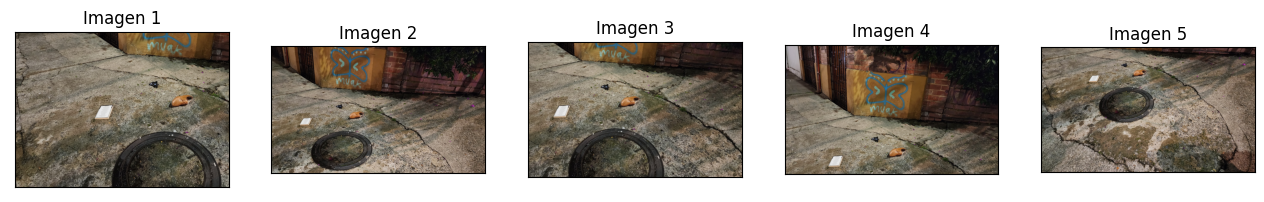

In [3]:
#visualizar las imagenes

plt.figure(figsize=(16,8))

plt.subplot(151)
plt.title("Imagen 1")
plt.imshow(img1_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(152)
plt.title("Imagen 2")
plt.imshow(img2_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(153)
plt.title("Imagen 3")
plt.imshow(img3_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(154)
plt.title("Imagen 4")
plt.imshow(img4_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(155)
plt.title("Imagen 5")
plt.imshow(img5_rgb)
plt.xticks([]), plt.yticks([])
plt.show()

## Union de las dos primeras imagenes

### Visualización con SIFT, Brute-Force y RANSAC

In [4]:
# Emparejamiento de Caracteristicas
#Crear objeto SIFT, encontrar puntos de interes y sus descriptores
sift = cv2.SIFT_create(500)
sift.setContrastThreshold(0.1) #umbral bajo contraste
[keypoints1, descriptors1] = sift.detectAndCompute(img1_rgb, None) #puntos de interes
print('puntos de interes imagen1:', format(len(keypoints1)))

[keypoints2, descriptors2] = sift.detectAndCompute(img2_rgb, None) #puntos de interes
print('puntos de interes imagen2:', format(len(keypoints2)))


puntos de interes imagen1: 500
puntos de interes imagen2: 500


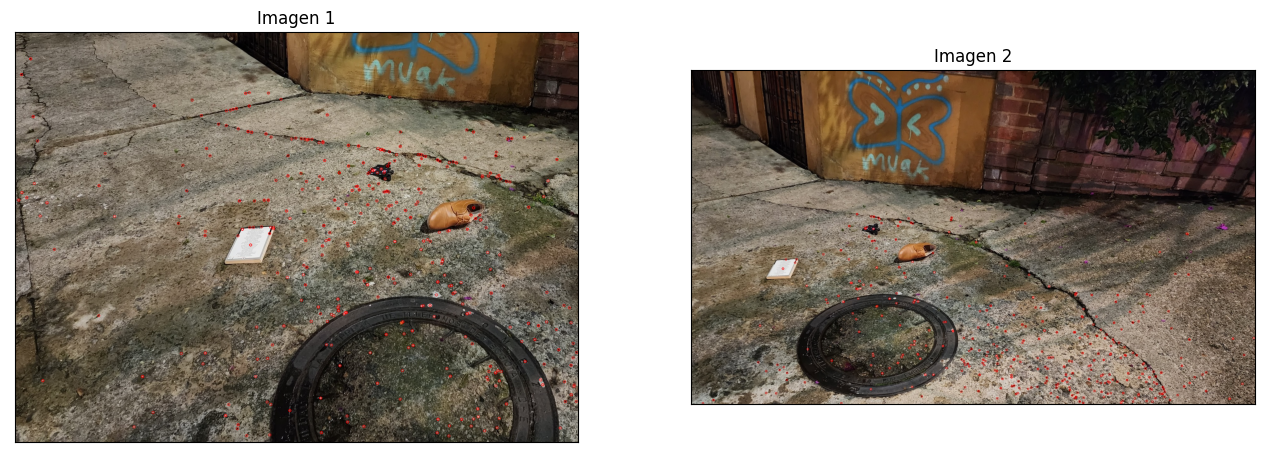

In [5]:
#visualizar puntos de interes sin flags
img_rgb_kp1 = cv2.drawKeypoints(img1_rgb, keypoints1, None, color=(255,0,0))
img_rgb_kp2 = cv2.drawKeypoints(img2_rgb, keypoints2, None, color=(255,0,0))

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title("Imagen 1")
plt.imshow(img_rgb_kp1) #mostrar imagen
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.title("Imagen 2")
plt.imshow(img_rgb_kp2) #mostrar imagen
plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
#BRUTE-FORCE
#crear objeto Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L1) #brute-force Matcher ORB
matches_bf = bf.knnMatch(descriptors1, descriptors2, k=2) #k parametro para el ranking

goodbf_1 = []
good_homographybf_1 = []
for m,n in matches_bf:
    if m.distance < 0.65*n.distance: #umbral de distancia maxima
        goodbf_1.append([m])
        good_homographybf_1.append(m)

print("puntos de interes emparejados con Brute-Force:", format(len(goodbf_1)))

puntos de interes emparejados con Brute-Force: 44


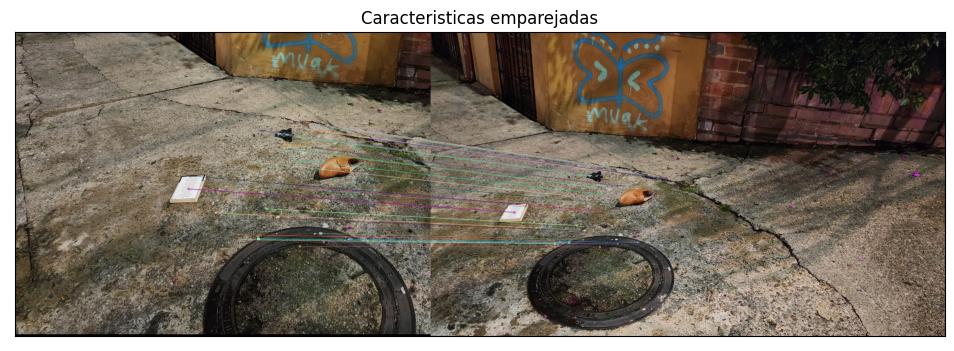

In [7]:
#visualizar los puntos de interes emparejados
emp_11 = cv2.drawMatchesKnn(img1_rgb, keypoints1, img2_rgb, keypoints2, goodbf_1, None,
                          flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 12))
plt.imshow(emp_11) #mostrar imagen
plt.title ('Caracteristicas emparejadas') 
plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
#Para Brute-Force
orig_pnts = np.float32([keypoints1[m.queryIdx].pt for m in good_homographybf_1]).reshape(-1,1,2)
dest_pnts = np.float32([keypoints2[m.trainIdx].pt for m in good_homographybf_1]).reshape(-1,1,2)

[MT, _] = cv2.findHomography(orig_pnts, dest_pnts, cv2.RANSAC, 5.0) #RANSAC



print("Matriz de transformacion de perspectiva RANSAC")
print(MT)

Matriz de transformacion de perspectiva RANSAC
[[ 1.03513012e+00  1.58156255e-01 -3.46420278e+02]
 [ 2.74659877e-02  1.06505869e+00  1.92365992e+02]
 [ 4.42864208e-05  4.16794025e-04  1.00000000e+00]]


### Union de la imagen 1 y 2 con la funcion "stitchy"

In [9]:
#union de las 2 primeras imagenes

images = [] #lista de las imagenes a unir
images.append(img1_rgb)
images.append(img2_rgb)

stitchy = cv2.Stitcher.create() #stitcher
(_,output) = stitchy.stitch(images) #se unen las imagenes

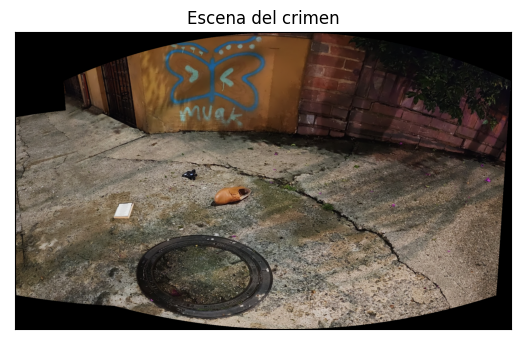

In [10]:
plt.figure()
plt.title("Escena del crimen")
plt.imshow(output)
plt.xticks([]), plt.yticks([])
plt.show()

## Union de las dos primeras imagenes con la tercera

### Visualización con SIFT, Brute-Force y RANSAC

In [11]:
# Emparejamiento de Caracteristicas
#Crear objeto SIFT, encontrar puntos de interes y sus descriptores
sift = cv2.SIFT_create(500)
sift.setContrastThreshold(0.1) #umbral bajo contraste
[keypoints12, descriptors12] = sift.detectAndCompute(output, None) #puntos de interes
print('puntos de interes imagen 1 y 2:', format(len(keypoints12)))

[keypoints3, descriptors3] = sift.detectAndCompute(img3_rgb, None) #puntos de interes
print('puntos de interes imagen3:', format(len(keypoints3)))


puntos de interes imagen 1 y 2: 501
puntos de interes imagen3: 501


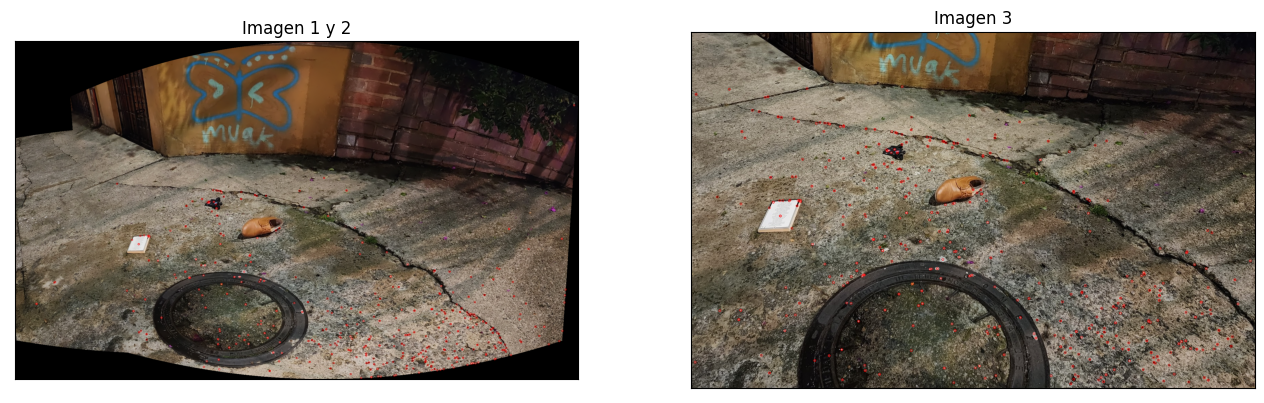

In [12]:
#visualizar puntos de interes sin flags
img_rgb_kp12 = cv2.drawKeypoints(output, keypoints12, None, color=(255,0,0))
img_rgb_kp3 = cv2.drawKeypoints(img3_rgb, keypoints3, None, color=(255,0,0))

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title("Imagen 1 y 2")
plt.imshow(img_rgb_kp12) #mostrar imagen
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.title("Imagen 3")
plt.imshow(img_rgb_kp3) #mostrar imagen
plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
#BRUTE-FORCE
#crear objeto Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L1) #brute-force Matcher ORB
matches_bf = bf.knnMatch(descriptors12, descriptors3, k=2) #k parametro para el ranking

goodbf_2 = []
good_homographybf_2 = []
for m,n in matches_bf:
    if m.distance < 0.65*n.distance: #umbral de distancia maxima
        goodbf_2.append([m])
        good_homographybf_2.append(m)
    

print("puntos de interes emparejados con Brute-Force:", format(len(goodbf_2)))

puntos de interes emparejados con Brute-Force: 55


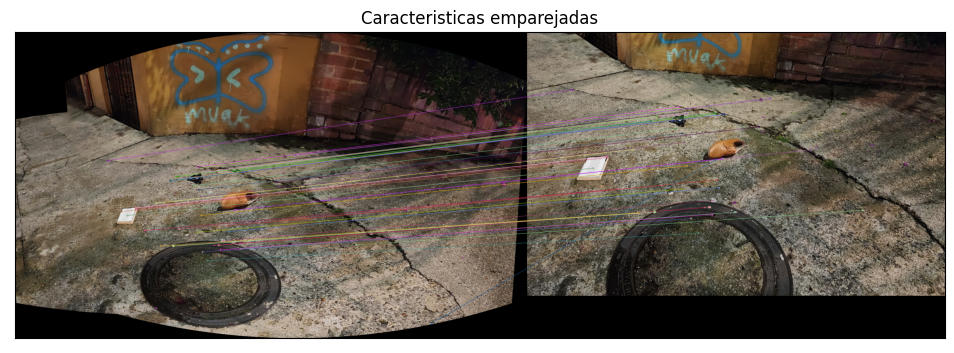

In [14]:
#visualizar los puntos de interes emparejados
emp_11 = cv2.drawMatchesKnn(output, keypoints12, img3_rgb, keypoints3, goodbf_2, None,
                          flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 12))
plt.imshow(emp_11) #mostrar imagen
plt.title ('Caracteristicas emparejadas') 
plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
#Para Brute-Force
orig_pnts = np.float32([keypoints12[m.queryIdx].pt for m in good_homographybf_2]).reshape(-1,1,2)
dest_pnts = np.float32([keypoints3[m.trainIdx].pt for m in good_homographybf_2]).reshape(-1,1,2)

[MT1, _] = cv2.findHomography(orig_pnts, dest_pnts, cv2.RANSAC, 5.0) #RANSAC



print("Matriz de transformacion de perspectiva RANSAC")
print(MT1)

Matriz de transformacion de perspectiva RANSAC
[[ 1.29261284e+00 -2.13310592e-01 -2.00197253e+02]
 [ 1.89838180e-01  1.01966828e+00 -3.77919117e+02]
 [ 3.81195952e-04 -4.61705455e-04  1.00000000e+00]]


### Union de la imagen 1, 2 y 3 con la funcion "stitchy"

In [16]:
#union con la imagen 3
images.append(img3_rgb)

stitchy = cv2.Stitcher.create() #stitcher
(_,output) = stitchy.stitch(images) #se unen las imagenes

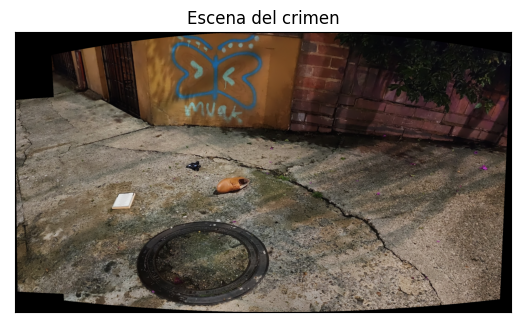

In [17]:
plt.figure()
plt.title("Escena del crimen")
plt.imshow(output)
plt.xticks([]), plt.yticks([])
plt.show()

## Union de las tres primeras imagenes con la cuarta

### Visualización con SIFT, Brute-Force y RANSAC

In [18]:
# Emparejamiento de Caracteristicas
#Crear objeto SIFT, encontrar puntos de interes y sus descriptores
sift = cv2.SIFT_create(500)
sift.setContrastThreshold(0.1) #umbral bajo contraste
[keypoints12, descriptors12] = sift.detectAndCompute(output, None) #puntos de interes
print('puntos de interes imagen 1, 2 y 3:', format(len(keypoints12)))

[keypoints4, descriptors4] = sift.detectAndCompute(img4_rgb, None) #puntos de interes
print('puntos de interes imagen4:', format(len(keypoints4)))


puntos de interes imagen 1, 2 y 3: 501
puntos de interes imagen4: 500


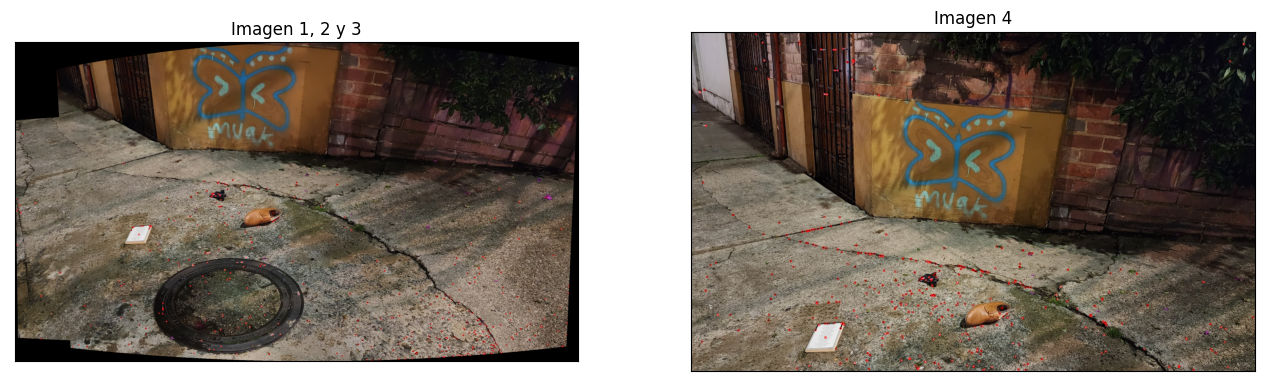

In [19]:
#visualizar puntos de interes sin flags
img_rgb_kp12 = cv2.drawKeypoints(output, keypoints12, None, color=(255,0,0))
img_rgb_kp4 = cv2.drawKeypoints(img4_rgb, keypoints4, None, color=(255,0,0))

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title("Imagen 1, 2 y 3")
plt.imshow(img_rgb_kp12) #mostrar imagen
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.title("Imagen 4")
plt.imshow(img_rgb_kp4) #mostrar imagen
plt.xticks([]), plt.yticks([])
plt.show()

In [20]:
#BRUTE-FORCE
#crear objeto Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L1) #brute-force Matcher ORB
matches_bf = bf.knnMatch(descriptors12, descriptors4, k=2) #k parametro para el ranking

goodbf_3 = []
good_homographybf_3 = []
for m,n in matches_bf:
    if m.distance < 0.65*n.distance: #umbral de distancia maxima
        goodbf_3.append([m])
        good_homographybf_3.append(m)
    

print("puntos de interes emparejados con Brute-Force:", format(len(goodbf_3)))

puntos de interes emparejados con Brute-Force: 48


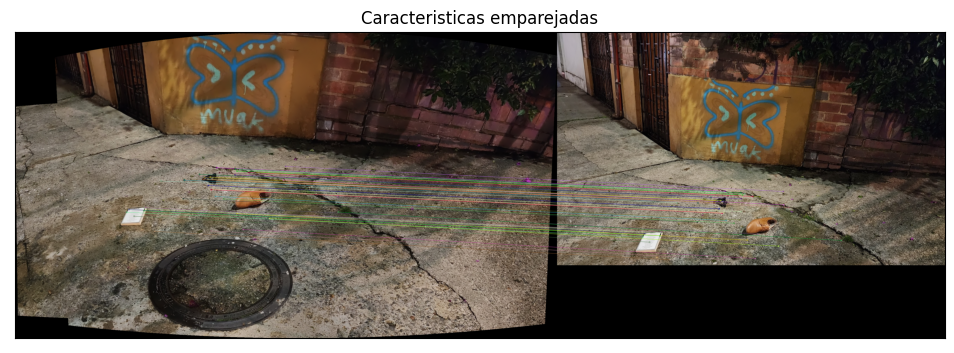

In [21]:
#visualizar los puntos de interes emparejados
emp_11 = cv2.drawMatchesKnn(output, keypoints12, img4_rgb, keypoints4, goodbf_3, None,
                          flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 12))
plt.imshow(emp_11) #mostrar imagen
plt.title ('Caracteristicas emparejadas') 
plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
#Para Brute-Force
orig_pnts = np.float32([keypoints12[m.queryIdx].pt for m in good_homographybf_3]).reshape(-1,1,2)
dest_pnts = np.float32([keypoints4[m.trainIdx].pt for m in good_homographybf_3]).reshape(-1,1,2)

[MT2, _] = cv2.findHomography(orig_pnts, dest_pnts, cv2.RANSAC, 5.0) #RANSAC



print("Matriz de transformacion de perspectiva RANSAC")
print(MT2)

Matriz de transformacion de perspectiva RANSAC
[[ 7.53082340e-01 -2.05477470e-01  7.96815516e+01]
 [ 6.06397791e-02  5.54255336e-01  2.16656730e+02]
 [ 5.35069106e-05 -3.33117427e-04  1.00000000e+00]]


### Union de la imagen 1, 2, 3 y 4 con la funcion "stitchy"

In [23]:
#union con la imagen 4
images.append(img4_rgb)

stitchy = cv2.Stitcher.create() #stitcher
(_,output) = stitchy.stitch(images) #se unen las imagenes

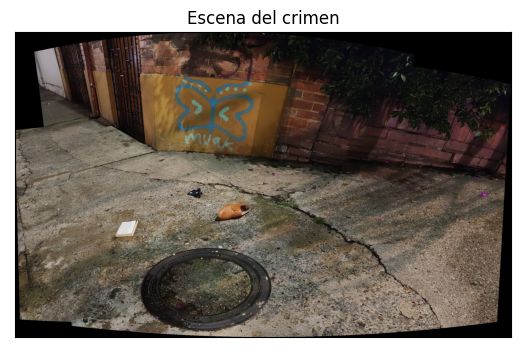

In [24]:
plt.figure()
plt.title("Escena del crimen")
plt.imshow(output)
plt.xticks([]), plt.yticks([])
plt.show()

## Union de las cuatro primeras imagenes con la ultima

### Visualización con SIFT, Brute-Force y RANSAC

In [25]:
# Emparejamiento de Caracteristicas
#Crear objeto SIFT, encontrar puntos de interes y sus descriptores
sift = cv2.SIFT_create(500)
sift.setContrastThreshold(0.1) #umbral bajo contraste
[keypoints12, descriptors12] = sift.detectAndCompute(output, None) #puntos de interes
print('puntos de interes imagen 1, 2, 3 y 4:', format(len(keypoints12)))

[keypoints5, descriptors5] = sift.detectAndCompute(img5_rgb, None) #puntos de interes
print('puntos de interes imagen4:', format(len(keypoints5)))


puntos de interes imagen 1, 2, 3 y 4: 501
puntos de interes imagen4: 500


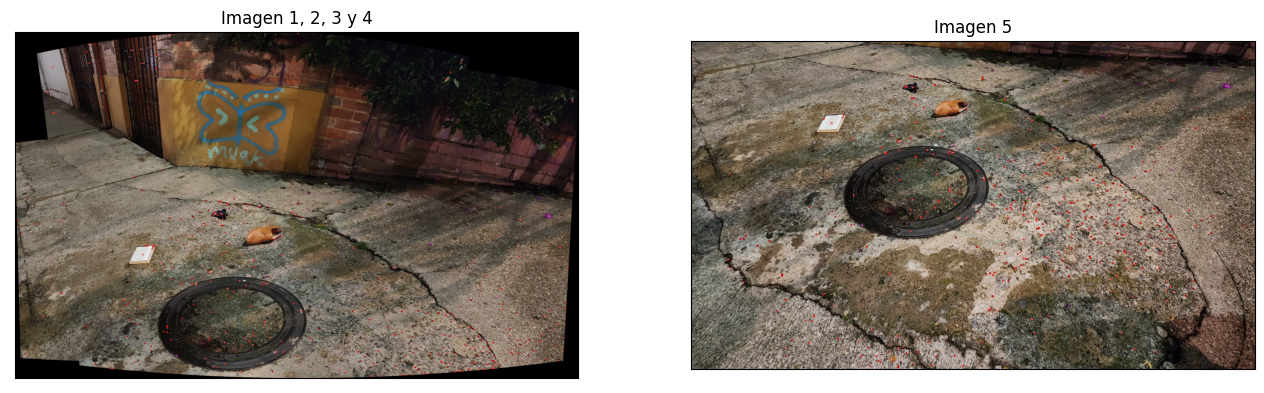

In [27]:
#visualizar puntos de interes sin flags
img_rgb_kp12 = cv2.drawKeypoints(output, keypoints12, None, color=(255,0,0))
img_rgb_kp5 = cv2.drawKeypoints(img5_rgb, keypoints5, None, color=(255,0,0))

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title("Imagen 1, 2, 3 y 4")
plt.imshow(img_rgb_kp12) #mostrar imagen
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.title("Imagen 5")
plt.imshow(img_rgb_kp5) #mostrar imagen
plt.xticks([]), plt.yticks([])
plt.show()

In [28]:
#BRUTE-FORCE
#crear objeto Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L1) #brute-force Matcher ORB
matches_bf = bf.knnMatch(descriptors12, descriptors5, k=2) #k parametro para el ranking

goodbf_4 = []
good_homographybf_4 = []
for m,n in matches_bf:
    if m.distance < 0.65*n.distance: #umbral de distancia maxima
        goodbf_4.append([m])
        good_homographybf_4.append(m)
    

print("puntos de interes emparejados con Brute-Force:", format(len(goodbf_4)))

puntos de interes emparejados con Brute-Force: 160


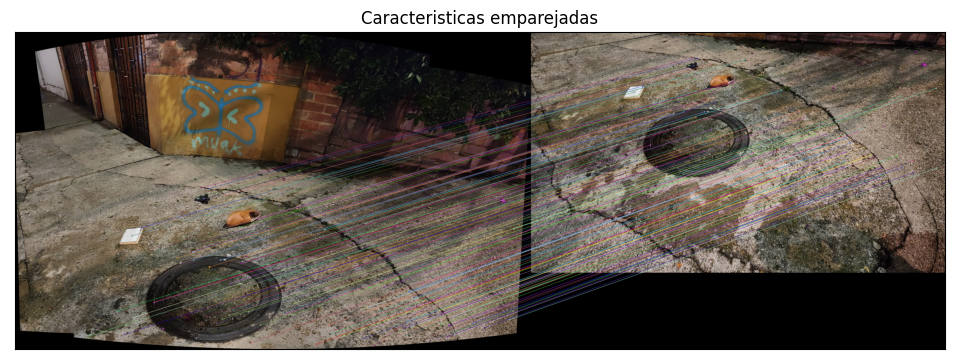

In [29]:
#visualizar los puntos de interes emparejados
emp_11 = cv2.drawMatchesKnn(output, keypoints12, img5_rgb, keypoints5, goodbf_4, None,
                          flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 12))
plt.imshow(emp_11) #mostrar imagen
plt.title ('Caracteristicas emparejadas') 
plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
#Para Brute-Force
orig_pnts = np.float32([keypoints12[m.queryIdx].pt for m in good_homographybf_4]).reshape(-1,1,2)
dest_pnts = np.float32([keypoints5[m.trainIdx].pt for m in good_homographybf_4]).reshape(-1,1,2)

[MT3, _] = cv2.findHomography(orig_pnts, dest_pnts, cv2.RANSAC, 5.0) #RANSAC



print("Matriz de transformacion de perspectiva RANSAC")
print(MT3)

Matriz de transformacion de perspectiva RANSAC
[[ 7.52135396e-01 -7.82145280e-02  1.43798640e+02]
 [ 2.05804170e-02  7.02005173e-01 -4.20883235e+02]
 [ 3.22748280e-05 -6.47890350e-05  1.00000000e+00]]


### Union de la imagen 1, 2, 3, 4 y 5 con la funcion "stitchy"

In [31]:
#union con la imagen 5
images.append(img5_rgb)

stitchy = cv2.Stitcher.create() #stitcher
(_,output) = stitchy.stitch(images) #se unen las imagenes

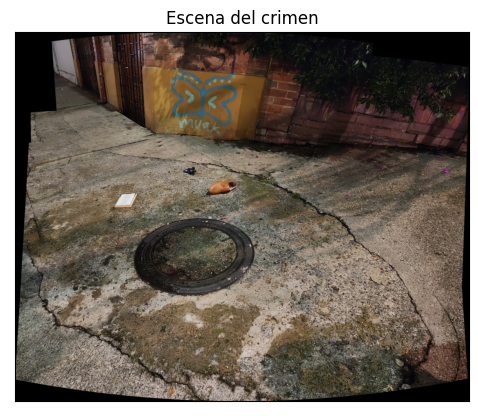

In [32]:
plt.figure()
plt.title("Escena del crimen")
plt.imshow(output)
plt.xticks([]), plt.yticks([])
plt.show()